### Exploratory Data Analysis ###

Importing libraries 

In [441]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

### Import data into pandas dataframe ### 

In [442]:
heart_disease_df = pd.read_csv("heart_disease_uci.csv")
heart_disease_df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


### Check for missing values in data set ### 

In [443]:
heart_disease_df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [444]:
# show all features that have missing values 
[feature for feature in heart_disease_df.columns if heart_disease_df[feature].isna().sum() > 0]

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

<Axes: >

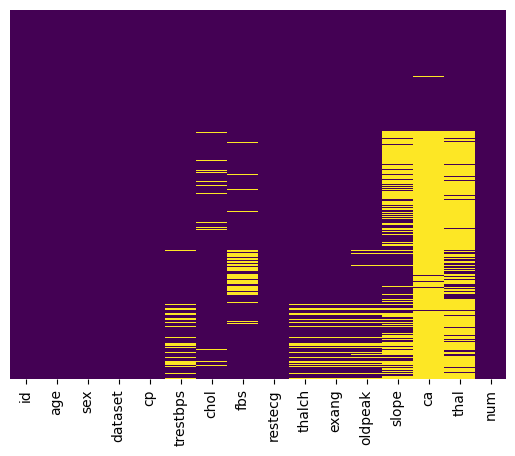

In [445]:
# using a heatmap to show the same features with missing values 
sns.heatmap(heart_disease_df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

## Using Chi-Square Test between target variable (num) and features with missing values to see if there is a statistical relationship between them ### 

In [446]:
from scipy.stats import chi2_contingency

In [447]:
# create contingency table 
thal_num_df = heart_disease_df[["thal", "num"]]
thal_num_df = thal_num_df.dropna()

thal = thal_num_df["thal"]
num = thal_num_df["num"]
contingency_table = pd.crosstab(thal, num)

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between thal and num.")
else:
    print("There is no significant association between thal and num.")

Chi-Square Statistic: 114.08119532134354
P-value: 5.5083128087344495e-21
Degrees of Freedom: 8
Expected Frequencies:
 [[19.8202765  11.23502304  6.67741935  6.57142857  1.69585253]
 [84.4516129  47.87096774 28.4516129  28.          7.22580645]
 [82.7281106  46.89400922 27.87096774 27.42857143  7.07834101]]
There is a significant association between thal and num.


In [448]:
# create contingency table 
ca_num_df = heart_disease_df[["ca", "num"]]
ca_num_df = ca_num_df.dropna()

ca = ca_num_df["ca"]
num = ca_num_df["num"]
contingency_table = pd.crosstab(ca, num)

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between ca and num.")
else:
    print("There is no significant association between ca and num.")

Chi-Square Statistic: 112.25917956288063
P-value: 2.1366337175556998e-18
Degrees of Freedom: 12
Expected Frequencies:
 [[96.65048544 33.97411003 21.08737864 21.67313916  7.61488673]
 [35.77669903 12.57605178  7.80582524  8.02265372  2.81877023]
 [21.89320388  7.69579288  4.77669903  4.90938511  1.72491909]
 [10.67961165  3.75404531  2.33009709  2.39482201  0.84142395]]
There is a significant association between ca and num.


In [449]:
# create contingency table 
slope_num_df = heart_disease_df[["slope", "num"]]
slope_num_df = slope_num_df.dropna()

slope = slope_num_df["slope"]
num = slope_num_df["num"]
contingency_table = pd.crosstab(slope, num)

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between slope and num.")
else:
    print("There is no significant association between slope and num.")

Chi-Square Statistic: 104.1291484912597
P-value: 6.10061701015126e-19
Degrees of Freedom: 8
Expected Frequencies:
 [[ 22.47790507  20.41571195   9.27986907   8.35188216   2.47463175]
 [123.09328969 111.80032733  50.81833061  45.73649755  13.55155483]
 [ 72.42880524  65.78396072  29.90180033  26.91162029   7.97381342]]
There is a significant association between slope and num.


In [450]:
# create contingency table 
fbs_num_df = heart_disease_df[["fbs", "num"]]
fbs_num_df = fbs_num_df.dropna()

fbs = fbs_num_df["fbs"]
num = fbs_num_df["num"]
contingency_table = pd.crosstab(fbs, num)

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between fbs and num.")
else:
    print("There is no significant association between fbs and num.")

Chi-Square Statistic: 24.67315549603282
P-value: 5.852437165074865e-05
Degrees of Freedom: 4
Expected Frequencies:
 [[330.99277108 187.59036145  73.3686747   78.37108434  21.67710843]
 [ 66.00722892  37.40963855  14.6313253   15.62891566   4.32289157]]
There is a significant association between fbs and num.


In [451]:
# pie chart for showing num distribution 
num_types = heart_disease_df.num.value_counts().index
num_types

Index([0, 1, 2, 3, 4], dtype='int64', name='num')

In [452]:
num_freq = heart_disease_df.num.value_counts().values
num_freq

array([411, 265, 109, 107,  28], dtype=int64)

([<matplotlib.patches.Wedge at 0x1e3c4878520>,
 [Text(0.1831986836988545, 1.084637378247222, '0'),
  Text(-0.9259323264768218, -0.5938428468755185, '1'),
  Text(0.30039165571367216, -1.0581894221629693, '2'),
  Text(0.9339570528734981, -0.5811404506553043, '3'),
  Text(1.0949757383194476, -0.10501491556812542, '4')],
 [Text(0.09992655474482971, 0.5916203881348483, '44.674%'),
  Text(-0.5050539962600845, -0.3239142801139191, '28.804%'),
  Text(0.16384999402563932, -0.5771942302707105, '11.848%'),
  Text(0.5094311197491806, -0.31698570035743867, '11.630%'),
  Text(0.5972594936287896, -0.05728086303715931, '3.043%')])

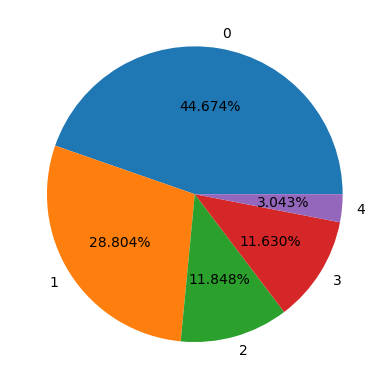

In [453]:
plt.pie(num_freq, labels = num_types, autopct = "%1.3f%%")

Observation: 45% of patients did not have heart disease, 55% of patients do have heart disease

### Checking for relationships between other features ###

In [454]:
heart_disease_df.groupby(["ca", "thal"]).size()

ca   thal             
0.0  fixed defect           8
     normal               115
     reversable defect     53
1.0  fixed defect           4
     normal                29
     reversable defect     32
2.0  fixed defect           4
     normal                14
     reversable defect     20
3.0  fixed defect           2
     normal                 6
     reversable defect     12
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '28'),
  Text(1, 0, '29'),
  Text(2, 0, '30'),
  Text(3, 0, '31'),
  Text(4, 0, '32'),
  Text(5, 0, '33'),
  Text(6, 0, '34'),
  Text(7, 0, '35'),
  Text(8, 0, '36'),
  Text(9, 0, '37'),
  Text(10, 0, '38'),
  Text(11, 0, '39'),
  Text(12, 0, '40'),
  Text(13, 0, '41'),
  Text(14, 0, '42'),
  Text(15, 0, '43'),
  Text(16, 0, '44'),
  Text(17, 0, '45'),
  Text(18, 0, '46'),
  Text(19, 0, '47'),
  Text(20, 0, '48'),
  Text(21, 0, '49'),
  Text(22, 0, '50'),
  Text(23, 0, '51'),
  Text(24, 0, '52'),
  Text(25, 0, '53'),
  Text(26, 0, '54'),
  Text(27, 0, '55'),
  Text(28, 0, '56'),
  Text(29, 0, '57'),
  Text(30, 0, '58'),
  Text(31, 0, '59'),
  Text(32, 0, '60'),
  Text(33, 0, '61'),
  Text(34, 0, '62'),
  Text(35, 0, '63'),
  Text(36, 0, '64'),
  Text(

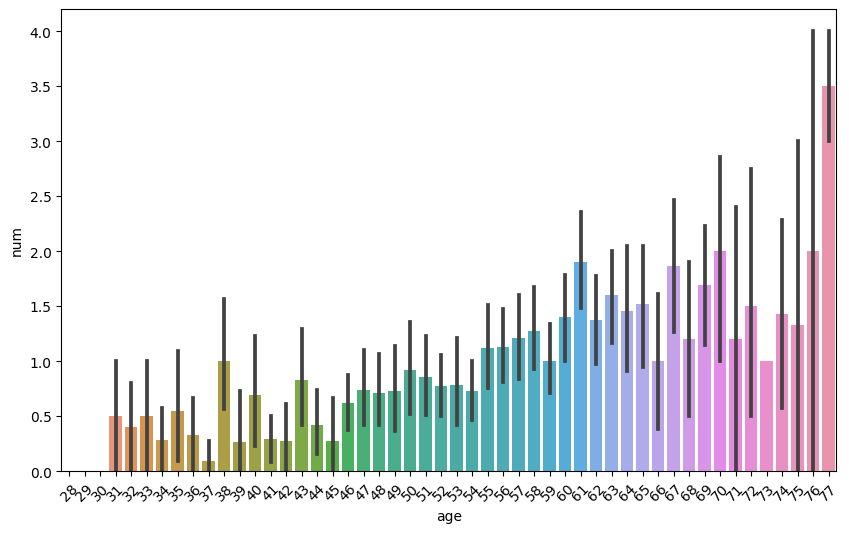

In [455]:
plt.figure(figsize=(10, 6))
sns.barplot(data = heart_disease_df, x = heart_disease_df["age"], y = heart_disease_df["num"])
plt.xticks(rotation = 45)

### Observation ###
In general, as people age they have a higher chance of getting heart disease

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

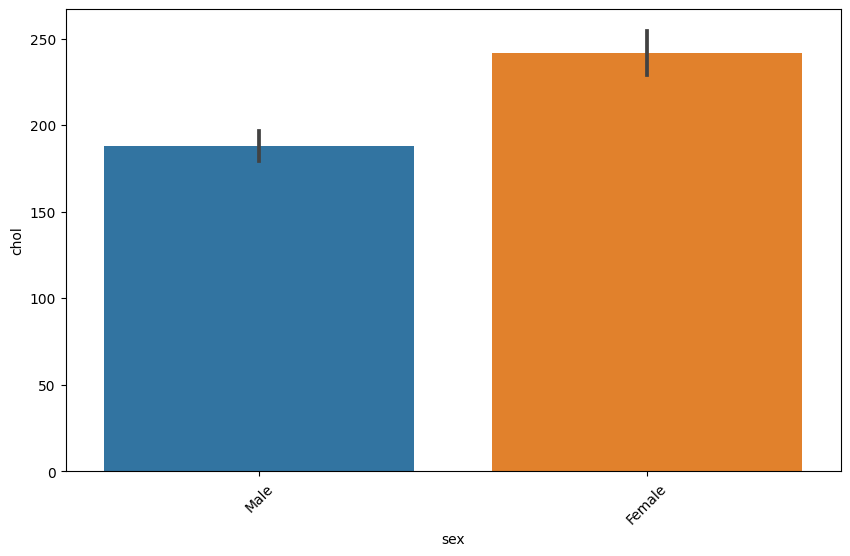

In [456]:
plt.figure(figsize=(10, 6))
sns.barplot(data = heart_disease_df, x = heart_disease_df["sex"], y = heart_disease_df["chol"])
plt.xticks(rotation = 45)

### Observation ###
1. Females cholosterol in general seems to be higher in this dataset than Males 

### Feature Engineering ###
1. Handling Categorical Features

In [457]:
categorical_features = heart_disease_df.select_dtypes(exclude = "number").columns
categorical_features

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [458]:
heart_disease_df["sex"] = heart_disease_df["sex"].map({"Female": 0, "Male": 1})
heart_disease_df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,1,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,1,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,1,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,0,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,1,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,1,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,1,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [459]:
# One Hot Encoding dataset feature 

dummy_df = pd.get_dummies(heart_disease_df["dataset"], prefix = "dataset", drop_first = True) 
heart_disease_df.drop(columns = ["dataset"], inplace = True)
heart_disease_df = pd.concat([heart_disease_df, dummy_df], axis = 1)
mapping = {True : 1, False : 0}
heart_disease_df[["dataset_Hungary", "dataset_Switzerland", "dataset_VA Long Beach"]] = heart_disease_df[["dataset_Hungary", "dataset_Switzerland", "dataset_VA Long Beach"]].applymap(lambda x: mapping.get(x, x))
heart_disease_df

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,1,63,1,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0,0,0
1,2,67,1,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,0,0,0
2,3,67,1,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,0,0,0
3,4,37,1,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0,0,0
4,5,41,0,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1,0,0,1
916,917,62,1,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
917,918,55,1,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2,0,0,1
918,919,58,1,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1


In [460]:
heart_disease_df["exang"] = heart_disease_df["exang"].map({True : 1, False : 0})
heart_disease_df["fbs"] = heart_disease_df["fbs"].map({True : 1, False : 0})
heart_disease_df.drop(columns = ["id"], inplace = True)
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,63,1,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0,0,0,0
1,67,1,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2,0,0,0
2,67,1,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1,0,0,0
3,37,1,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0,0,0,0
4,41,0,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,asymptomatic,127.0,333.0,1.0,st-t abnormality,154.0,0.0,0.0,NaN,NaN,NaN,1,0,0,1
916,62,1,typical angina,NaN,139.0,0.0,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
917,55,1,asymptomatic,122.0,223.0,1.0,st-t abnormality,100.0,0.0,0.0,NaN,NaN,fixed defect,2,0,0,1
918,58,1,asymptomatic,NaN,385.0,1.0,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1


In [461]:
# One Hot Encoding cp feature 

dummy_df = pd.get_dummies(heart_disease_df["cp"], prefix = "cp", drop_first = True) 
heart_disease_df.drop(columns = ["cp"], inplace = True)
heart_disease_df = pd.concat([heart_disease_df, dummy_df], axis = 1)
mapping = {True : 1, False : 0}
heart_disease_df[["cp_atypical angina",	"cp_non-anginal", "cp_typical angina"]] = heart_disease_df[["cp_atypical angina", "cp_non-anginal",	"cp_typical angina"]].applymap(lambda x: mapping.get(x, x))
heart_disease_df

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0,0,0,0,0,0,1
1,67,1,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2,0,0,0,0,0,0
2,67,1,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1,0,0,0,0,0,0
3,37,1,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0,0,0,0,0,1,0
4,41,0,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,127.0,333.0,1.0,st-t abnormality,154.0,0.0,0.0,NaN,NaN,NaN,1,0,0,1,0,0,0
916,62,1,NaN,139.0,0.0,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,1
917,55,1,122.0,223.0,1.0,st-t abnormality,100.0,0.0,0.0,NaN,NaN,fixed defect,2,0,0,1,0,0,0
918,58,1,NaN,385.0,1.0,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0


In [462]:
heart_disease_df["restecg"].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

### Analyzing the restecg scan results ### 

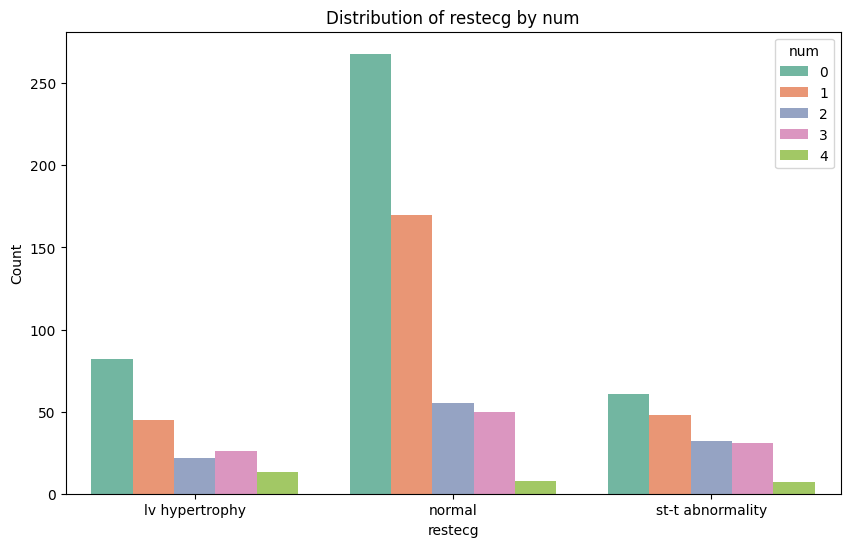

In [463]:
# Create a countplot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=heart_disease_df, x='restecg', hue='num', palette='Set2')

# Customize the plot
plt.title('Distribution of restecg by num')
plt.xlabel('restecg')
plt.ylabel('Count')

# Show the legend (optional)
plt.legend(title='num', labels=['0', '1', '2', '3', '4'], loc='upper right')

# Show the plot
plt.show()

### Observation ###
Nothing too significant, most people regardless of scan results did not have heart disease

In [464]:
# One Hot Encoding restecg feature 

dummy_df = pd.get_dummies(heart_disease_df["restecg"], prefix = "ecg", drop_first = True) 
heart_disease_df.drop(columns = ["restecg"], inplace = True)
heart_disease_df = pd.concat([heart_disease_df, dummy_df], axis = 1)
mapping = {True : 1, False : 0}
heart_disease_df[["ecg_normal", "ecg_st-t abnormality"]] = heart_disease_df[["ecg_normal", "ecg_st-t abnormality"]].applymap(lambda x: mapping.get(x, x))
heart_disease_df

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,num,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,ecg_normal,ecg_st-t abnormality
0,63,1,145.0,233.0,1.0,150.0,0.0,2.3,downsloping,0.0,fixed defect,0,0,0,0,0,0,1,0,0
1,67,1,160.0,286.0,0.0,108.0,1.0,1.5,flat,3.0,normal,2,0,0,0,0,0,0,0,0
2,67,1,120.0,229.0,0.0,129.0,1.0,2.6,flat,2.0,reversable defect,1,0,0,0,0,0,0,0,0
3,37,1,130.0,250.0,0.0,187.0,0.0,3.5,downsloping,0.0,normal,0,0,0,0,0,1,0,1,0
4,41,0,130.0,204.0,0.0,172.0,0.0,1.4,upsloping,0.0,normal,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,127.0,333.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1,0,0,1,0,0,0,0,1
916,62,1,NaN,139.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1
917,55,1,122.0,223.0,1.0,100.0,0.0,0.0,NaN,NaN,fixed defect,2,0,0,1,0,0,0,0,1
918,58,1,NaN,385.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0


In [465]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    920 non-null    int64  
 1   sex                    920 non-null    int64  
 2   trestbps               861 non-null    float64
 3   chol                   890 non-null    float64
 4   fbs                    830 non-null    float64
 5   thalch                 865 non-null    float64
 6   exang                  865 non-null    float64
 7   oldpeak                858 non-null    float64
 8   slope                  611 non-null    object 
 9   ca                     309 non-null    float64
 10  thal                   434 non-null    object 
 11  num                    920 non-null    int64  
 12  dataset_Hungary        920 non-null    int64  
 13  dataset_Switzerland    920 non-null    int64  
 14  dataset_VA Long Beach  920 non-null    int64  
 15  cp_aty

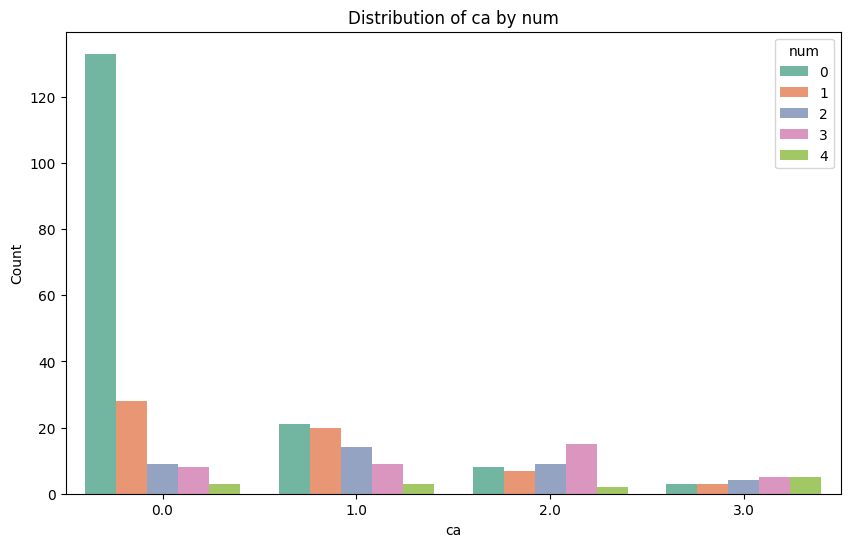

In [466]:
# Create a countplot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=heart_disease_df, x = "ca", hue = "num", palette = "Set2")

# Customize the plot
plt.title("Distribution of ca by num")
plt.xlabel("ca")
plt.ylabel("Count")

# Show the legend (optional)
plt.legend(title = "num", labels = ['0', '1', '2', '3', '4'], loc = "upper right")

# Show the plot
plt.show()

In [467]:
# Using mode to replace NaN values in ca feature 
ca_mode = heart_disease_df.ca.mode().iloc[0]
heart_disease_df["ca"] = heart_disease_df["ca"].fillna(ca_mode)
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    920 non-null    int64  
 1   sex                    920 non-null    int64  
 2   trestbps               861 non-null    float64
 3   chol                   890 non-null    float64
 4   fbs                    830 non-null    float64
 5   thalch                 865 non-null    float64
 6   exang                  865 non-null    float64
 7   oldpeak                858 non-null    float64
 8   slope                  611 non-null    object 
 9   ca                     920 non-null    float64
 10  thal                   434 non-null    object 
 11  num                    920 non-null    int64  
 12  dataset_Hungary        920 non-null    int64  
 13  dataset_Switzerland    920 non-null    int64  
 14  dataset_VA Long Beach  920 non-null    int64  
 15  cp_aty

In [468]:
# Using mode to replace NaN values in slope feature 
slope_mode = heart_disease_df.slope.mode().iloc[0]
heart_disease_df["slope"] = heart_disease_df["slope"].fillna(ca_mode)
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    920 non-null    int64  
 1   sex                    920 non-null    int64  
 2   trestbps               861 non-null    float64
 3   chol                   890 non-null    float64
 4   fbs                    830 non-null    float64
 5   thalch                 865 non-null    float64
 6   exang                  865 non-null    float64
 7   oldpeak                858 non-null    float64
 8   slope                  920 non-null    object 
 9   ca                     920 non-null    float64
 10  thal                   434 non-null    object 
 11  num                    920 non-null    int64  
 12  dataset_Hungary        920 non-null    int64  
 13  dataset_Switzerland    920 non-null    int64  
 14  dataset_VA Long Beach  920 non-null    int64  
 15  cp_aty

In [469]:
# One Hot Encoding slope feature 

dummy_df = pd.get_dummies(heart_disease_df["slope"], prefix = "slope", drop_first = True) 
heart_disease_df.drop(columns = ["slope"], inplace = True)
heart_disease_df = pd.concat([heart_disease_df, dummy_df], axis = 1)
mapping = {True : 1, False : 0}
heart_disease_df[["slope_downsloping","slope_flat", "slope_upsloping"]] = heart_disease_df[["slope_downsloping", "slope_flat", "slope_upsloping"]].applymap(lambda x: mapping.get(x, x))
heart_disease_df

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,thal,...,dataset_Switzerland,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,ecg_normal,ecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping
0,63,1,145.0,233.0,1.0,150.0,0.0,2.3,0.0,fixed defect,...,0,0,0,0,1,0,0,1,0,0
1,67,1,160.0,286.0,0.0,108.0,1.0,1.5,3.0,normal,...,0,0,0,0,0,0,0,0,1,0
2,67,1,120.0,229.0,0.0,129.0,1.0,2.6,2.0,reversable defect,...,0,0,0,0,0,0,0,0,1,0
3,37,1,130.0,250.0,0.0,187.0,0.0,3.5,0.0,normal,...,0,0,0,1,0,1,0,1,0,0
4,41,0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,normal,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,127.0,333.0,1.0,154.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,1,0,0,0
916,62,1,NaN,139.0,0.0,NaN,NaN,NaN,0.0,NaN,...,0,1,0,0,1,0,1,0,0,0
917,55,1,122.0,223.0,1.0,100.0,0.0,0.0,0.0,fixed defect,...,0,1,0,0,0,0,1,0,0,0
918,58,1,NaN,385.0,1.0,NaN,NaN,NaN,0.0,NaN,...,0,1,0,0,0,0,0,0,0,0


In [470]:
heart_disease_df["thal"].value_counts()
thal_mode = heart_disease_df.thal.mode()[0]
heart_disease_df["thal"] = heart_disease_df["thal"].fillna(thal_mode)
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    920 non-null    int64  
 1   sex                    920 non-null    int64  
 2   trestbps               861 non-null    float64
 3   chol                   890 non-null    float64
 4   fbs                    830 non-null    float64
 5   thalch                 865 non-null    float64
 6   exang                  865 non-null    float64
 7   oldpeak                858 non-null    float64
 8   ca                     920 non-null    float64
 9   thal                   920 non-null    object 
 10  num                    920 non-null    int64  
 11  dataset_Hungary        920 non-null    int64  
 12  dataset_Switzerland    920 non-null    int64  
 13  dataset_VA Long Beach  920 non-null    int64  
 14  cp_atypical angina     920 non-null    int64  
 15  cp_non

In [471]:
# One Hot Encoding thal feature 

dummy_df = pd.get_dummies(heart_disease_df["thal"], prefix = "thal", drop_first = True) 
heart_disease_df.drop(columns = ["thal"], inplace = True)
heart_disease_df = pd.concat([heart_disease_df, dummy_df], axis = 1)
mapping = {True : 1, False : 0}
heart_disease_df[["thal_normal", "thal_reversable defect"]] = heart_disease_df[["thal_normal", "thal_reversable defect"]].applymap(lambda x: mapping.get(x, x))
heart_disease_df

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_atypical angina,cp_non-anginal,cp_typical angina,ecg_normal,ecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,0,0,1,0,0,1,0,0,0,0
1,67,1,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,...,0,0,0,0,0,0,1,0,1,0
2,67,1,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,0,0,0,0,0,0,1,0,0,1
3,37,1,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,1,0,1,0,0,1,0
4,41,0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,127.0,333.0,1.0,154.0,0.0,0.0,0.0,1,...,0,0,0,0,1,0,0,0,1,0
916,62,1,NaN,139.0,0.0,NaN,NaN,NaN,0.0,0,...,0,0,1,0,1,0,0,0,1,0
917,55,1,122.0,223.0,1.0,100.0,0.0,0.0,0.0,2,...,0,0,0,0,1,0,0,0,0,0
918,58,1,NaN,385.0,1.0,NaN,NaN,NaN,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [472]:
# drop remaining columns 
heart_disease_df.dropna(inplace = True)
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 0 to 919
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     741 non-null    int64  
 1   sex                     741 non-null    int64  
 2   trestbps                741 non-null    float64
 3   chol                    741 non-null    float64
 4   fbs                     741 non-null    float64
 5   thalch                  741 non-null    float64
 6   exang                   741 non-null    float64
 7   oldpeak                 741 non-null    float64
 8   ca                      741 non-null    float64
 9   num                     741 non-null    int64  
 10  dataset_Hungary         741 non-null    int64  
 11  dataset_Switzerland     741 non-null    int64  
 12  dataset_VA Long Beach   741 non-null    int64  
 13  cp_atypical angina      741 non-null    int64  
 14  cp_non-anginal          741 non-null    int64  

### MODEL TRAINING ###

In [473]:
heart_disease_df.head(50)

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_atypical angina,cp_non-anginal,cp_typical angina,ecg_normal,ecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,0,0,1,0,0,1,0,0,0,0
1,67,1,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,...,0,0,0,0,0,0,1,0,1,0
2,67,1,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,0,0,0,0,0,0,1,0,0,1
3,37,1,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,1,0,1,0,0,1,0
4,41,0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,1,0,0,0,0,0,0,1,1,0
5,56,1,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,1,0,0,1,0,0,0,1,1,0
6,62,0,140.0,268.0,0.0,160.0,0.0,3.6,2.0,3,...,0,0,0,0,0,1,0,0,1,0
7,57,0,120.0,354.0,0.0,163.0,1.0,0.6,0.0,0,...,0,0,0,1,0,0,0,1,1,0
8,63,1,130.0,254.0,0.0,147.0,0.0,1.4,1.0,2,...,0,0,0,0,0,0,1,0,0,1
9,53,1,140.0,203.0,1.0,155.0,1.0,3.1,0.0,1,...,0,0,0,0,0,1,0,0,0,1


### Scaling numerical/continuous features ### 

In [474]:
from sklearn.preprocessing import StandardScaler 
numerical_cols_to_scale = ["age", "trestbps", "chol", "thalch", "oldpeak"]
scaler = StandardScaler()
# Create a new DataFrame with the scaled values
scaled_values = scaler.fit_transform(heart_disease_df[numerical_cols_to_scale])

# Update the original DataFrame with the scaled values
heart_disease_df[numerical_cols_to_scale] = scaled_values
heart_disease_df

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_atypical angina,cp_non-anginal,cp_typical angina,ecg_normal,ecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.053690,1,0.659345,0.136456,1.0,0.436207,0.0,1.295248,0.0,0,...,0,0,1,0,0,1,0,0,0,0
1,1.479417,1,1.467619,0.703128,0.0,-1.190982,1.0,0.558727,3.0,2,...,0,0,0,0,0,0,1,0,1,0
2,1.479417,1,-0.687778,0.093688,0.0,-0.377388,1.0,1.571443,2.0,1,...,0,0,0,0,0,0,1,0,0,1
3,-1.713539,1,-0.148929,0.318218,0.0,1.869684,0.0,2.400029,0.0,0,...,0,1,0,1,0,1,0,0,1,0
4,-1.287811,0,-0.148929,-0.173610,0.0,1.288545,0.0,0.466662,0.0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.947258,1,1.359849,-0.537136,0.0,-0.028704,1.0,-0.822249,0.0,1,...,0,0,0,0,1,0,0,0,1,0
914,-0.755652,1,0.066611,0.959734,0.0,-0.493615,0.0,-0.822249,0.0,2,...,0,0,0,1,0,0,0,0,1,0
915,0.095803,0,-0.310584,1.205648,1.0,0.591178,0.0,-0.822249,0.0,1,...,0,0,0,0,1,0,0,0,1,0
917,0.202235,1,-0.580008,0.029536,1.0,-1.500923,0.0,-0.822249,0.0,2,...,0,0,0,0,1,0,0,0,0,0


In [475]:
from sklearn.model_selection import train_test_split
X = heart_disease_df.drop(columns = ["num"])
y = heart_disease_df["num"]
y = y.map({0 : 0, 1 : 1, 2 : 1, 3 : 1, 4 : 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [476]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_preds = lgr.predict(X_test)
acc = accuracy_score(y_preds, y_test)
acc

0.8053691275167785

In [477]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 10)
dtc.fit(X_train, y_train)
y_preds = dtc.predict(X_test)
acc = accuracy_score(y_preds, y_test)
acc

0.7651006711409396

In [478]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
acc = accuracy_score(y_preds, y_test)
acc

0.8456375838926175